# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/)

<img src="assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Exploration

How many different colours does the LEGO company produce?

In [2]:
colour_data = pd.read_csv("data/colors.csv")
colour_data.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
colour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [4]:
colour_data["name"].nunique()

135

Finding the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>

In [5]:
colour_data["is_trans"].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

 

In [6]:
sets_data = pd.read_csv("data/sets.csv")

In [7]:
sets_data.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
sets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


In [9]:
sets_data.isna().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets_data.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Looks like LEGO started all the way back in 1949! 

How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets_data[sets_data["year"]==1949]


,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Back in 1949, LEGO got started selling only 5 different sets! 

Finding the top 5 LEGO sets with the most number of parts. 

In [12]:
sets_data.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


The largest LEGO set ever produced has around 10,000 pieces!

Using <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [13]:
sets_by_year = sets_data.groupby("year").count()

In [14]:
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [15]:
sets_by_year["set_num"].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

Showing the number of LEGO releases on a line chart using Matplotlib. 
Note that the .csv file is from late 2020, so to plot the full calendar years, we will have to exclude some data from your chart.

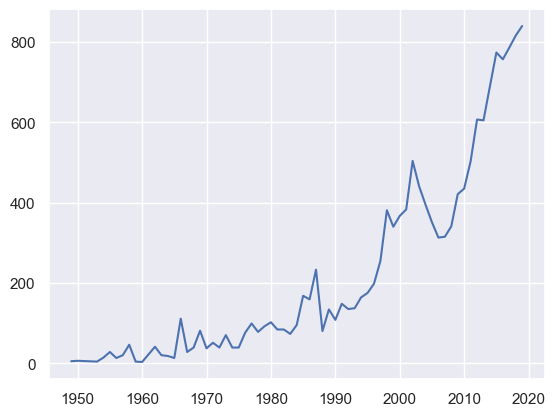

In [16]:
plt.plot(sets_by_year.index[:-2], sets_by_year["set_num"][:-2])

**We see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.**

### Aggregating Data 

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [17]:
themes_by_year = sets_data.groupby("year").agg({"theme_id":pd.Series.nunique})

In [18]:
themes_by_year.rename(columns={"theme_id":"nr_themes"}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years.**

Ploting the number of themes released by year on a line chart. Only includes the full calendar years (i.e., exclude 2020 and 2021). 

Text(0, 0.5, 'Themes')

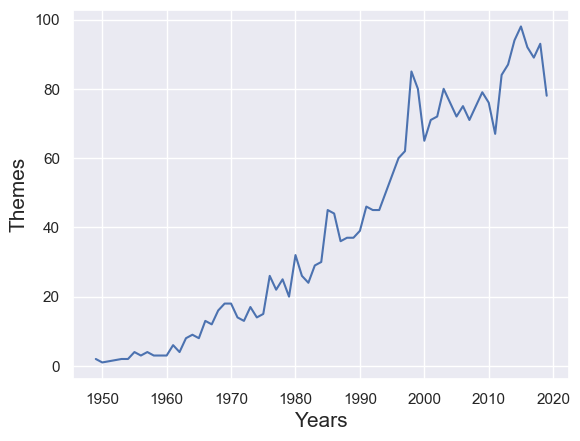

In [19]:
plt.plot(themes_by_year.index[:-2], themes_by_year["nr_themes"][:-2])
plt.xlabel("Years", fontsize=15)
plt.ylabel("Themes", fontsize=15)

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Themes')

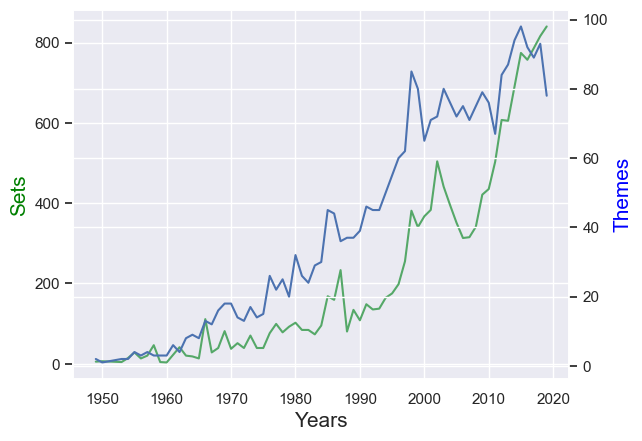

In [20]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year["set_num"][:-2], color="g")
ax2.plot(themes_by_year.index[:-2], themes_by_year["nr_themes"][:-2], "b")

ax1.set_xlabel("Years", fontsize=15)
ax1.set_ylabel("Sets", color="green", fontsize=15)
ax2.set_ylabel("Themes", color="blue", fontsize = 15)

Using the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [21]:
avg_parts = sets_data.groupby("year").agg({"num_parts":pd.Series.mean})

In [22]:
avg_parts

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots

Has the size and complexity of LEGO sets increased over time based on the number of parts? Plotting the average number of parts over time using a Matplotlib scatter plot.

Text(0, 0.5, 'AVG Number of parts')

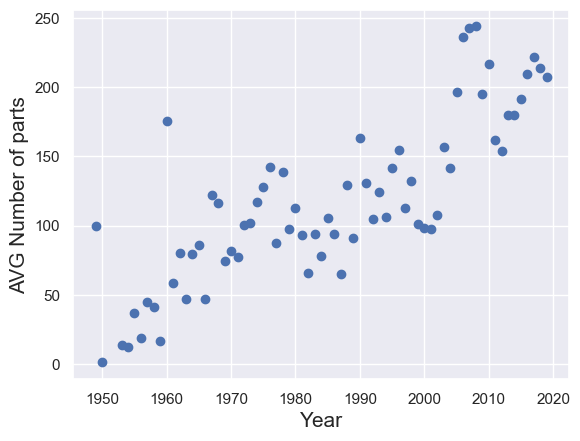

In [23]:
plt.scatter(avg_parts.index[:-2], avg_parts["num_parts"][:-2])
plt.xlabel("Year",fontsize=15)
plt.ylabel("AVG Number of parts", fontsize=15)

**From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.**

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [24]:
set_theme_counts = sets_data["theme_id"].value_counts()
set_theme_counts

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

Exploring the themes.csv. How is it structured? Searching for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now using these <code>id</code>s and finding the corresponding sets in the sets.csv

In [25]:
themes_data = pd.read_csv("data/themes.csv")

In [26]:
themes_data.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [27]:
themes_data[themes_data["name"]=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [28]:
sets_data[sets_data["theme_id"] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters.

In [29]:
sets_data[sets_data["theme_id"] == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Merging (i.e., Combining) DataFrames based on a Key


In [30]:
set_theme_count = pd.DataFrame({"id":set_theme_counts.index,
                                "set_count":set_theme_counts.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


In [31]:
merged_df = pd.merge(set_theme_count, themes_data, on="id")
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


Text(0, 0.5, 'Num of sets')

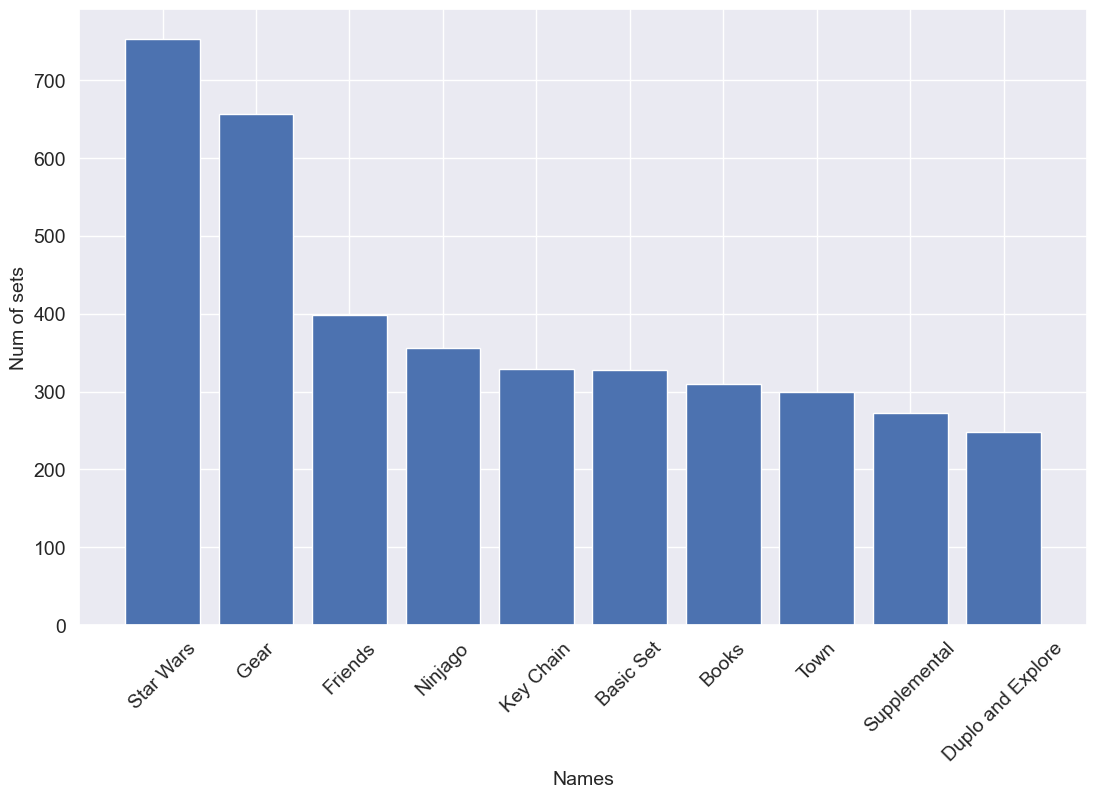

In [32]:
plt.figure(figsize=(13,8))
plt.bar(merged_df["name"][:10], merged_df["set_count"][:10])
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Names", fontsize=14)
plt.ylabel("Num of sets", fontsize=14)